# **IPL Data Analysis Using Python Pandas**

**Little detail about IPL (Indian Premier League).
The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league. IPL has an exclusive window in ICC Future Tours Programme.
The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of IPL in 2018 was US Dollar 6.3 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (US Dollar 182 million) to the GDP of the Indian economy.
There have been eleven seasons of the IPL tournament. The current IPL title holders are the Chennai Super Kings, who won the 2018 season. The most successful franchises in the tournament are the Chennai Super Kings and Mumbai Indians with 3 tournament wins each.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
#Selecting top 3 rows from the dataframe
df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


**Let's check then number of observations in the data.**

In [4]:
# Fetching number of rows in the dataframe
df.shape[0]

696

**Let's check the number of matches each team won till now in the IPL history.**

In [5]:
df['winner'].sort_values().value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

**Did you notice that we have "Rising Pune Supergiant" 2 times in the above list. One with the name as "Rising Pune Supergiant" and other as "Rising Pune Supergiants". Let's cleanse the data by modifying the "Rising Pune Supergiants" to "Rising Pune Supergiant". Also, it can be present in other columns as well like 'team1', 'team2' , 'toss_winner'. Lets replace in all the columns at once. Though, it can be done in many ways, we will use the apply() function to do so.**

In [6]:
df.loc[df['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
#But we have to replace in other series as well like 'team1', 'team2',etc.
df[['team1','team2','toss_winner','winner']] = df[['team1','team2','toss_winner','winner']].apply(lambda val : val.str.replace('Rising Pune Supergiants','Rising Pune Supergiant') )

**Let's now find the numbers of wins for each team.**

In [7]:
df['winner'].sort_values().value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiant         15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

**Another way of doing the same as above, because we have id as primary key (meaning we have different id for each match).**

In [8]:
# Grouping the number of matched won by teams and sorting it based on the count of the matches.
winners_df = df.groupby('winner', sort = False).count().id.sort_values(ascending = False)
winners_df

winner
Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiant         15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: id, dtype: int64

**Let's plot a simple bar graph for the above data.**

In [9]:
# A simple plot for the winners.
winners_df.plot(kind = 'bar', title = 'Number of matches won in IPL', label = 'Number of wins' )

**Let's do some analysis on relation between winning the toss and the match. Let's find total number of times/matches where a team won the toss and also won the match. Also, we will find the opposite as well. Number of times team won the toss and lost the match.**

In [10]:
# case where team won the toss and also won the match
winning_toss_winning_match = df[(df['toss_winner'] == df['winner'])]

In [11]:
# cases where team won the toss but lost the match
winning_toss_losing_match = df[(df['toss_winner'] != df['winner'])]

In [12]:
new_df = pd.DataFrame({"Team won the toss":[ winning_toss_winning_match.shape[0],winning_toss_losing_match.shape[0]  ]}, index = ['Won match', 'Lost match']  )

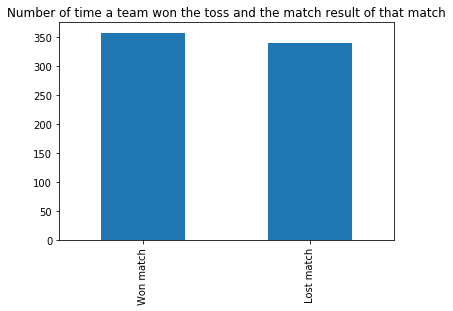

In [13]:
#Let's plot the above obervations
new_df.plot( kind = 'bar' , legend = False , title = "Number of time a team won the toss and the match result of that match")

**From above analysis, we can say that there is no significant impact of toss on the match result.**

**Now, there are discussion on team winning the toss and choosing to bat and bowl first. We will analyse which had more success with winning the toss and batting first and which team had more success when they choose to bowl first.**

In [14]:
# Same as above, now we will check how many times team winning the toss and  batting first won and how many times team bowling first won
# For this we have to check if the team won the toss and toss_decision is bat/field and winning team is toss_winner
# NOTE : in this type of analysis we are considering that the team has won the toss and its their decision to select to bat or bowl
team_batting_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner']]
team_fielding_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'),  ['id', 'winner']]

In [15]:
team_fielding_first_won_df= team_fielding_first_won['winner'].value_counts()
team_batting_first_won_df = team_batting_first_won['winner'].value_counts()

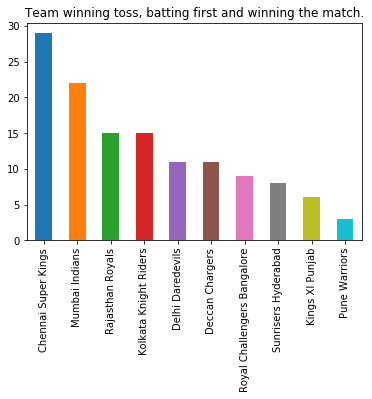

In [16]:
team_batting_first_won_df.plot(kind = 'bar', title = 'Team winning toss, batting first and winning the match.')

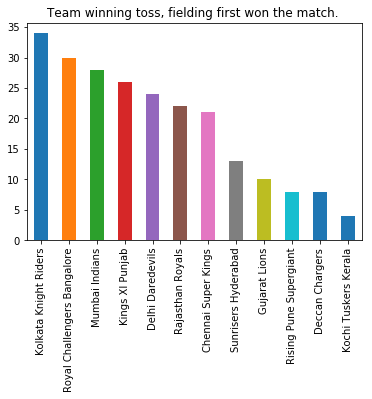

In [17]:
team_fielding_first_won_df.plot(kind = 'bar', title = 'Team winning toss, fielding first won the match. ')

**Let's do another analysis**

In [18]:
df['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Indore             9
Johannesburg       8
Bengaluru          7
Cuttack            7
Port Elizabeth     7
Ranchi             7
Cape Town          7
Abu Dhabi          7
Raipur             6
Sharjah            6
Kochi              5
Kanpur             4
East London        3
Kimberley          3
Mohali             3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

**If you see above data, we have Bangalore and Bengaluru which refers to the same city.So we will replace "Banglaore" which is the old name of the city "Bengaluru".**

In [19]:
#Two ways to do the same
df.loc[df['city'] == 'Bangalore', 'city'] = 'Bengaluru'
#Another way 
#Changing city name from Bangalore to Bengaluru
df['city'] = df['city'].str.replace('Bangalore','Bengaluru')

**Let's analyse how "Duckworth–Lewis method" affects result of match based on team batting first or bowling first.**

In [20]:
#Creating a dataframe, which holds the records where the match result is decided by "Duckworth-Lewis method".
new_df = df.loc[ df['dl_applied'] != 0 ,['id','team1','team2','toss_winner','toss_decision','dl_applied','winner']]

In [21]:
# Now we have to create a new column to decide which team has batted first for each match. I am gonna create a function for it and apply 
# that function to the dataframe ***

def set_batting_first(team1, team2, toss_winner, toss_decision):
    if toss_decision == 'bat':
        return toss_winner
    else:
        if team1 == toss_winner:
            return team2
        else:
            return team1  

In [22]:
for items in new_df.loc[: , ['team1','team2','toss_winner','toss_decision','bat_first']].itertuples():
    new_df.loc[items[0] , 'bat_first'] = set_batting_first(items[1], items[2], items[3], items[4])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [23]:
#Now we are gonna create 1 more column named "is_bat_first_win" which will have 1 if the team batting first won and 0 if team batting 1 lost.
new_df['is_bat_first_win'] = 0
new_df.loc[new_df['bat_first'] == new_df['winner'],'is_bat_first_win'] = 1

In [24]:
#Lets create a new dataframe with just two results as below.
dl_bat_first_win = pd.DataFrame(new_df['is_bat_first_win'].value_counts())
dl_bat_first_win.index = ['field_first_wins','bat_first_wins']

**Below figure shows the number of times "Duckworth–Lewis method" is applied and the team fielding first(or team batting second) won the match. This provided a direct connection between how "Duckworth–Lewis method" favours team batting second, though the topic is still argued the most.**

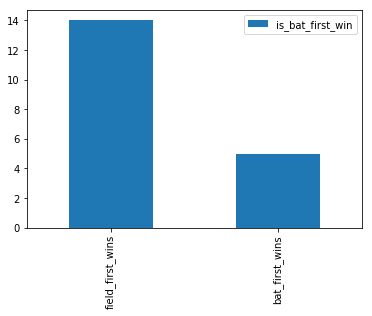

In [25]:
dl_bat_first_win.plot(kind = 'bar')

**A win margin of more than 100 runs or more than 8 wickets in T20 is considered huge. Let's do an analysis on how many occassion, a team has lost the match with more than 100 run or more than 8 tickets. NOTE : we are gonna ignore the matches in which "Duckworth–Lewis method" is applied.**

In [26]:
# New dataframe where DL method is not applied and win margin is 100 or more runs or more than 8 wickets.
new_df = df.loc[ (df['dl_applied'] == 0) & ((df['win_by_runs'] > 99) | (df['win_by_wickets'] > 8)) , ['id','team1','team2','winner','win_by_runs','win_by_wickets']]

In [27]:
#creating a new column to track the losing team 
new_df['losing_team'] = np.nan

In [28]:
# I will create a method to fetch the losing team from the dataframe
def check_losing_team(row):
    if row['team1'] == row['winner']:
        row['losing_team'] = row['team2']
        return row['team2']
    else:
        row['losing_team'] = row['team1']
        return row['team1']

In [29]:
new_df['losing_team'] = new_df.apply(check_losing_team, axis = 1)

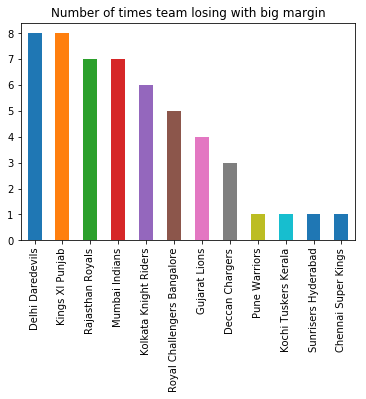

In [30]:
new_df.losing_team.value_counts().plot(kind = 'bar', title = 'Number of times team losing with big margin')

**Let's do analysis on Number of times a player got the Man of the Match till 2017 edition of IPL.**

In [31]:
# number of times the playes got Man of the match
mom_players = df.player_of_match.value_counts()

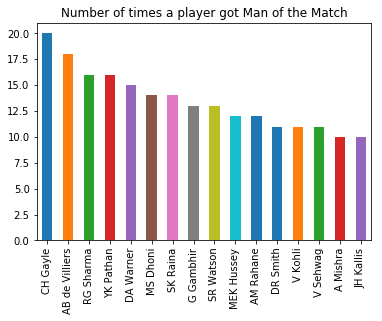

In [32]:
# we want to analyse only those players who got the award atleast 10 times
mom_players[mom_players >= 10 ].plot(kind = 'bar', title = 'Number of times a player got Man of the Match')